# Project 2

### Akintunde Rockson

## Intro

Major League Baseball is a professional baseball league, where teams pay players to play baseball. The goal of each team is to win as many games out of a 162 game season as possible. Teams win games by scoring more runs ("getting more points") than their adversary. In principle, better players are costlier, so teams that want good players need to spend more money. Teams that spend the most, frequently win the most. So, the question is, how can a team that can't spend so much win? The basic idea that Oakland (and other teams) used is to redefine what makes a player good, i.e., figure out what player characteristics translated into wins. Once they realized that teams were not really pricing players using these characteristics, they could exploit this to pay for undervalued players, players that were good according to their metrics, but were not recognized as such by other teams, and therefore not as expensive.

In this project, I will apply data wrangling and exploratory data analysis skills to baseball data. In particular, I want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up. I want to see how this i reflected in the data

## Data

I will be using data from a very useful database on baseball teams, players and seasons curated by Sean Lahman available at http://www.seanlahman.com/baseball-archive/statistics/. The database has been made available as a sqlite database https://github.com/jknecht/baseball-archive-sqlite. Importing the sqlite package provides a straightforward interface to extract data from sqlite databases using standard SQL commands.

## Wrangling 

Using SQL to compute a relation containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination).

In [396]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT teamID, yearID, sum(salary)/1000 as total_payroll_by_thousand, sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID, yearID"

team_salaries = pd.read_sql(salary_query, conn)

team_query = "SELECT (W*100.0/G) as winning_percentage, * FROM Teams GROUP BY teamID, yearID"

team_table = pd.read_sql(team_query, conn)

result = pd.merge(team_salaries, team_table, how='inner', on=['teamID','yearID'])

result

teamID  yearID  total_payroll_by_thousand  payroll_mean  \
0      ATL    1985                  14807.000  6.730455e+05   
1      BAL    1985                  11560.712  5.254869e+05   
2      BOS    1985                  10897.560  4.359024e+05   
3      CAL    1985                  14427.894  5.152819e+05   
4      CHA    1985                   9846.178  4.688656e+05   
..     ...     ...                        ...           ...   
853    SLN    2014                 120693.000  4.310464e+06   
854    TBA    2014                  72689.100  2.907564e+06   
855    TEX    2014                 112255.059  4.677294e+06   
856    TOR    2014                 109920.100  4.396804e+06   
857    WAS    2014                 131983.680  4.399456e+06   

     winning_percentage lgID franchID divID  Rank    G  ...     DP     FP  \
0             40.740741   NL      ATL     W     5  162  ...  197.0  0.970   
1             51.552795   AL      BAL     E     4  161  ...  168.0  0.980   
2             49.693252   AL      BOS     E     5  163  ...  161.0  0.970   
3             55.555556   AL      ANA     W     2  162  ...  202.0  0.980   
4             52.147239   AL      CHW     W     3  163  ...  152.0  0.980   
..                  ...  ...      ...   ...   ...  ...  ...    ...    ...   
853           55.555556   NL      STL     C     1  162  ...  145.0  0.985   
854           47.530864   AL      TBD     E     4  162  ...   96.0  0.985   
855           41.358025   AL      TEX     W     5  162  ...  155.0  0.982   
856           51.234568   AL      TOR     E     3  162  ...  130.0  0.985   
857           59.259259   NL      WSN     E     1  162  ...  139.0  0.984   

                     name                           park attendance  BPF  PPF  \
0          Atlanta Braves  Atlanta-Fulton County Stadium  1350137.0  105  106   
1       Baltimore Orioles               Memorial Stadium  2132387.0   97   97   
2          Boston Red Sox                 Fenway Park II  1786633.0  104  104   
3       California Angels                Anaheim Stadium  2567427.0  100  100   
4       Chicago White Sox                  Comiskey Park  1669888.0  104  104   
..                    ...                            ...        ...  ...  ...   
853   St. Louis Cardinals              Busch Stadium III  3540649.0  101  100   
854        Tampa Bay Rays                Tropicana Field  1446464.0   97   97   
855         Texas Rangers  Rangers Ballpark in Arlington  2718733.0  101  101   
856     Toronto Blue Jays                  Rogers Centre  2375525.0  102  102   
857  Washington Nationals                 Nationals Park  2579389.0  104  102   

     teamIDBR  teamIDlahman45  teamIDretro  
0         ATL             ATL          ATL  
1         BAL             BAL          BAL  
2         BOS             BOS          BOS  
3         CAL             CAL          CAL  
4         CHW             CHA          CHA  
..        ...             ...          ...  
853       STL             SLN          SLN  
854       TBR             TBA          TBA  
855       TEX             TEX          TEX  
856       TOR             TOR          TOR  
857       WSN             MON          WAS  

[858 rows x 51 columns]

There is missing data in team_table so I used an inner join to intersect the tables based on yearID and teamID after getting the data from the SQL query

## Exploratory Data Analysis

#### Producing plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014)

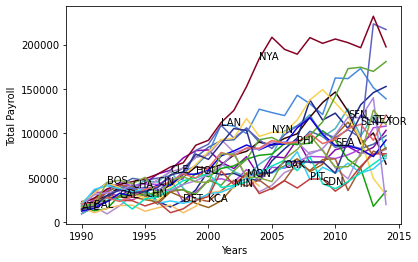

In [397]:
%matplotlib inline

result.sort_values("yearID", ascending=True)
temp = result[result['yearID'] >= 1990] 
temp = temp[temp['yearID'] <= 2014]
teams = temp['teamID'].drop_duplicates()
temp = temp[['yearID', 'teamID', 'total_payroll_by_thousand']]
temp = temp.set_index('teamID')
year = 1990
for t in teams:
    temp1 = temp.loc[lambda x: x.yearID == year, :]
    if t in temp1.index:
        num = temp1.loc[t]['total_payroll_by_thousand']
        plt.annotate(t, xy = (year, num))
        plt.plot(temp.loc[t]['yearID'], temp.loc[t]['total_payroll_by_thousand'],color=np.random.rand(3,))
        if (year < 2014):
            year+=1
        else:
            year = 1990

plt.xlabel('Years')
plt.ylabel('Total Payroll')
plt.rcParams["figure.figsize"] = (20,10)

The payroll distribution seems to be trending upwards for all teams, but the magnitude of the increase is different for all the teams in the league with some teams doing better than others

Text(0, 0.5, 'Mean Salary')

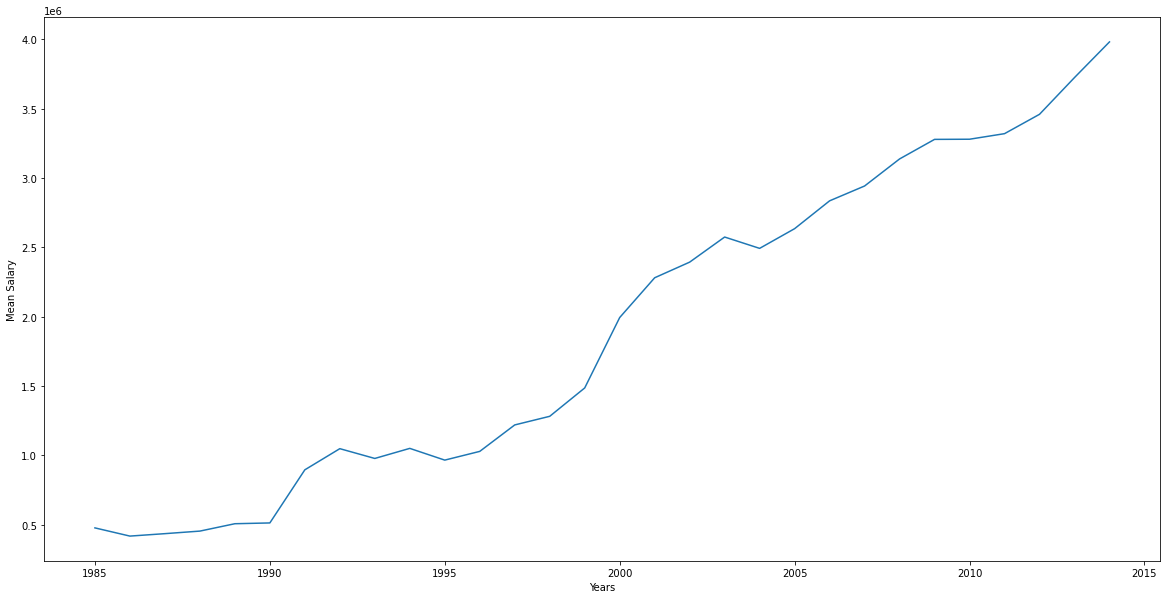

In [398]:
mean_query = "SELECT yearID, sum(salary)/count(salary) as salary_mean FROM Salaries GROUP BY yearID"
mean_table = pd.read_sql(mean_query,conn)
result = pd.merge(result, mean_table, how='inner', on=['yearID'])

result.sort_values("salary_mean", ascending=True)
plt.plot(result['yearID'],result['salary_mean'])
plt.xlabel('Years')
plt.ylabel('Mean Salary')


This plot shows the upward trend of the mean salary over time, proving the previous point

#### Discretizing year into five time periods and then making a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods. 

In [399]:
new_query1 = "SELECT  teamID,yearID, sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID,yearID"
new_query2 = "SELECT  teamID,yearID, W*100/G as winning_percentage FROM Teams GROUP BY teamID,yearID"
query1_table = pd.read_sql(new_query1, conn)
query2_table = pd.read_sql(new_query2,conn)

group_table = pd.merge(query1_table, query2_table, how='inner', on=['yearID','teamID'])

group_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']
categories = pd.cut(group_table['yearID'],[1989,1994,1999,2004,2009,2015],labels=group_names)
group_table['categories'] = pd.cut(group_table['yearID'], [1989,1994,1999,2004,2009,2015], labels=group_names)

catgroup = group_table.groupby('categories')

group1 = catgroup.get_group('1990-1994')
group2 = catgroup.get_group('1995-1999')
group3 = catgroup.get_group('2000-2004')
group4 = catgroup.get_group('2005-2009')
group5 = catgroup.get_group('2010-2015')

def plotgroups(grp):
    teams = grp['teamID'].drop_duplicates()
    temp = grp[['teamID', 'winning_percentage', 'payroll_mean']]
    temp = temp.set_index('teamID')
    for t in teams:
        temp1 = grp.loc[lambda x: x.teamID == t, :]
        best_row = temp1.loc[temp1['winning_percentage'].idxmax()]
        plt.annotate(t, xy = (best_row['winning_percentage'], best_row['payroll_mean']))
        if t == 'OAK':
            plt.plot(temp.loc[t]['winning_percentage'], temp.loc[t]['payroll_mean'],color=np.random.rand(3,))
        plt.plot(temp.loc[t]['winning_percentage'], temp.loc[t]['payroll_mean'],'*',color=np.random.rand(3,))
    plt.xlabel('Mean Payroll')
    plt.ylabel('Winning %')
    plt.rcParams["figure.figsize"] = (20,10)

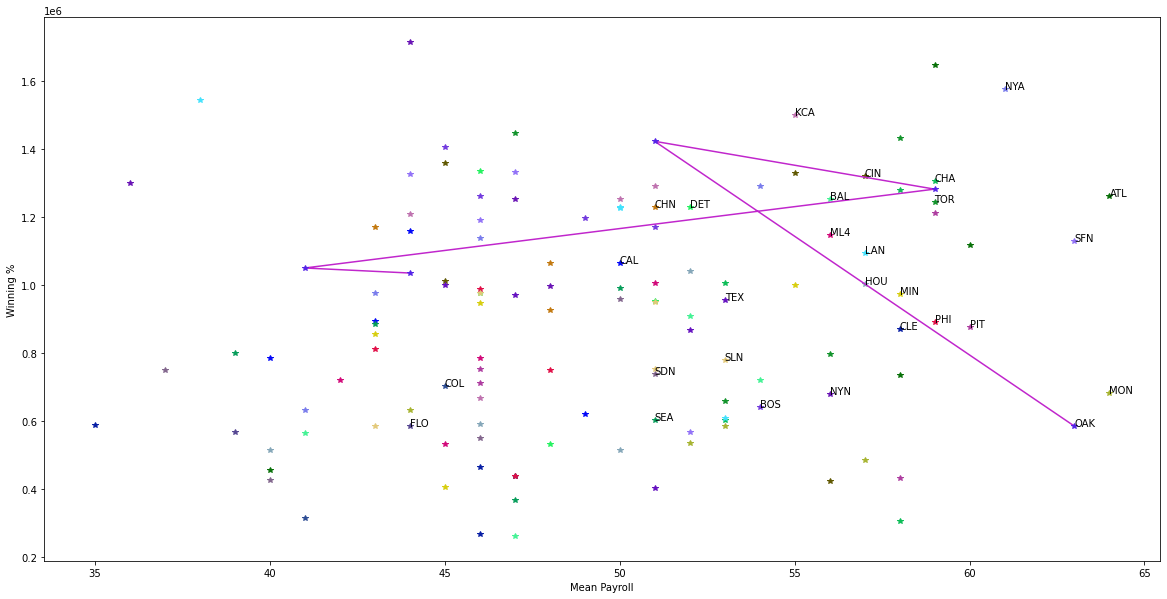

In [400]:
#1990-94
plotgroups(group1)

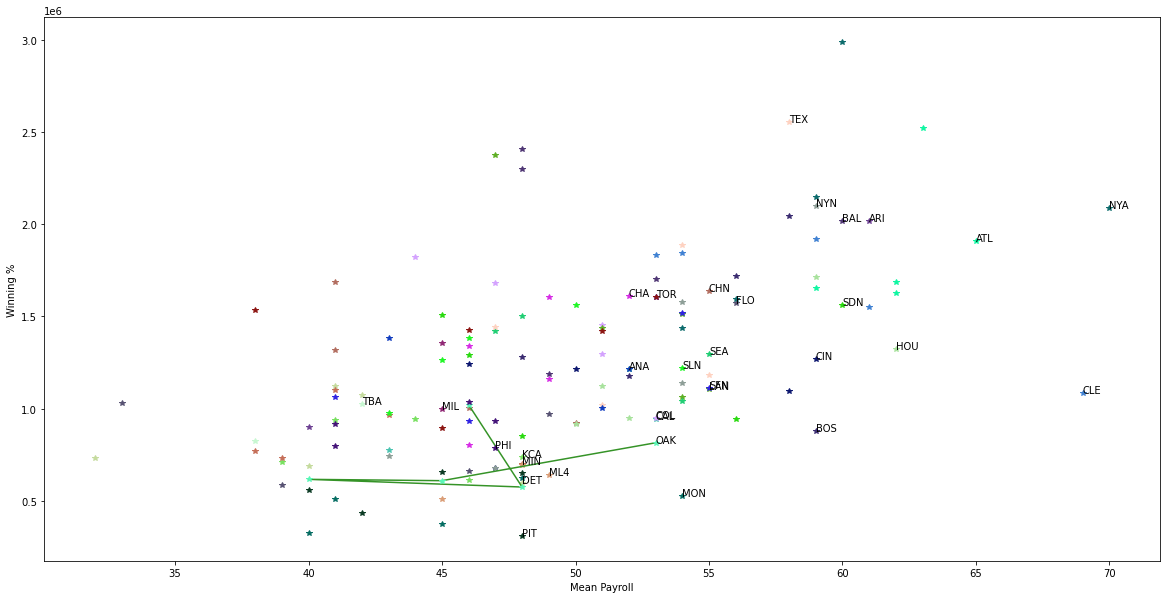

In [401]:
#1995-99
plotgroups(group2)

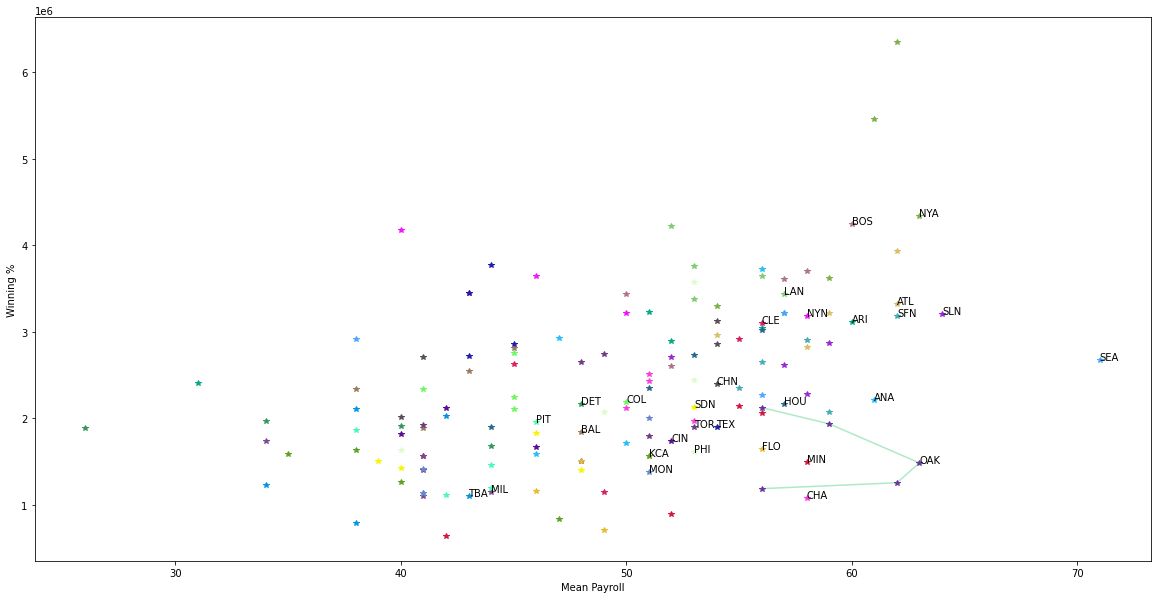

In [402]:
#2000-04
plotgroups(group3)

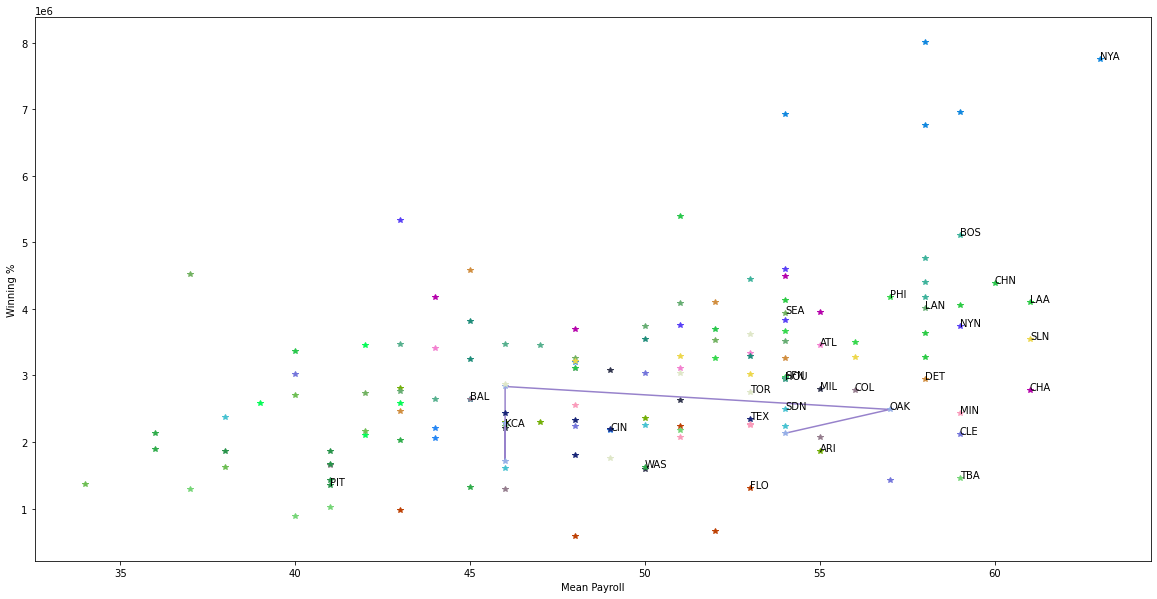

In [403]:
#2005-09
plotgroups(group4)

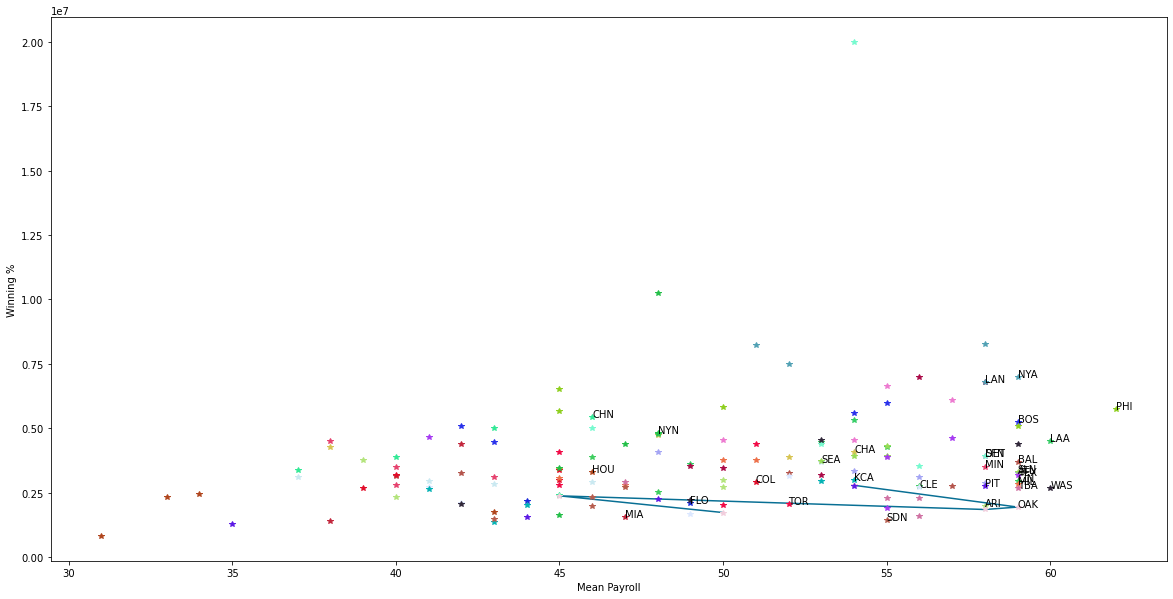

In [404]:
#2010-14
plotgroups(group5)

The New York Yankees is the standout across all the time periods when it comes to paying for wins.
Oakland A's spending efficiency across these time periods seems to be around the mean as they don't really stand out in general.

## Part 3: Data transformations

#### Creating a new variable that standardizes payroll conditioned on year.

In [405]:
curr = 1985
payroll_list = []
payroll_avg = {}
payroll_std = {}

for index, row in query1_table.iterrows():
    if curr != row['yearID']:
        avg = np.mean(payroll_list)
        std = np.std(payroll_list)
        payroll_avg[curr] = avg
        payroll_std[curr] = std
        curr = row['yearID']
        payroll_list= [row['payroll_mean']]
        
    else:
        payroll_list.append(row['payroll_mean'])
payroll_std[curr] = np.std(payroll_list)
payroll_avg[curr] = np.mean(payroll_list)

stand_list = []

for index, row in query1_table.iterrows():
    curr = row['yearID']
    payroll = row['payroll_mean']
    stand_list.append((payroll - payroll_avg[curr]) / payroll_std[curr])
    
query1_table['Standardized_Payroll'] = stand_list
query1_table

teamID  yearID  payroll_mean  Standardized_Payroll
0      ATL    1985  6.730455e+05              1.985378
1      BAL    1985  5.254869e+05              0.510155
2      BOS    1985  4.359024e+05             -0.385469
3      CAL    1985  5.152819e+05              0.408131
4      CHA    1985  4.688656e+05             -0.055918
..     ...     ...           ...                   ...
855    SLN    2014  4.310464e+06             -0.090724
856    TBA    2014  2.907564e+06             -0.516197
857    TEX    2014  4.677294e+06              0.020529
858    TOR    2014  4.396804e+06             -0.064538
859    WAS    2014  4.399456e+06             -0.063734

[860 rows x 4 columns]

#### Discretizing year into time periods again with the standardized payroll

In [406]:
group_table = pd.merge(query1_table, query2_table, how='inner', on=['yearID','teamID'])

group_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']
categories = pd.cut(group_table['yearID'],[1989,1994,1999,2004,2009,2015],labels=group_names)
group_table['categories'] = pd.cut(group_table['yearID'], [1989,1994,1999,2004,2009,2015], labels=group_names)

catgroup = group_table.groupby('categories')

group1 = catgroup.get_group('1990-1994')
group2 = catgroup.get_group('1995-1999')
group3 = catgroup.get_group('2000-2004')
group4 = catgroup.get_group('2005-2009')
group5 = catgroup.get_group('2010-2015')

def plotgroup(grp): #function for plotting
    teams = grp['teamID'].drop_duplicates()
    temp = grp[['teamID', 'winning_percentage', 'Standardized_Payroll']]
    temp = temp.set_index('teamID')
    for t in teams:
        temp1 = grp.loc[lambda x: x.teamID == t, :]
        best_row = temp1.loc[temp1['winning_percentage'].idxmax()]
        plt.annotate(t, xy = (best_row['winning_percentage'], best_row['Standardized_Payroll']))
        plt.plot(temp.loc[t,'winning_percentage'], temp.loc[t,'Standardized_Payroll'],'*',color=np.random.rand(3,))
    plt.xlabel('Standardized Payroll')
    plt.ylabel('Winning %')
    plt.rcParams["figure.figsize"] = (20,10)

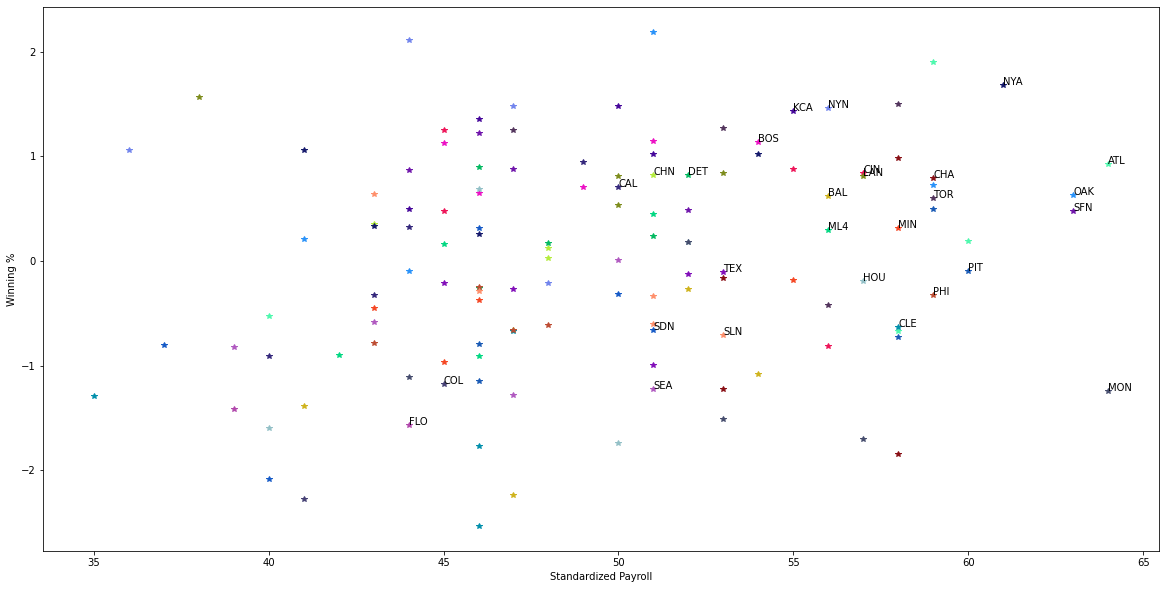

In [407]:
#1990-94
plotgroup(group1)

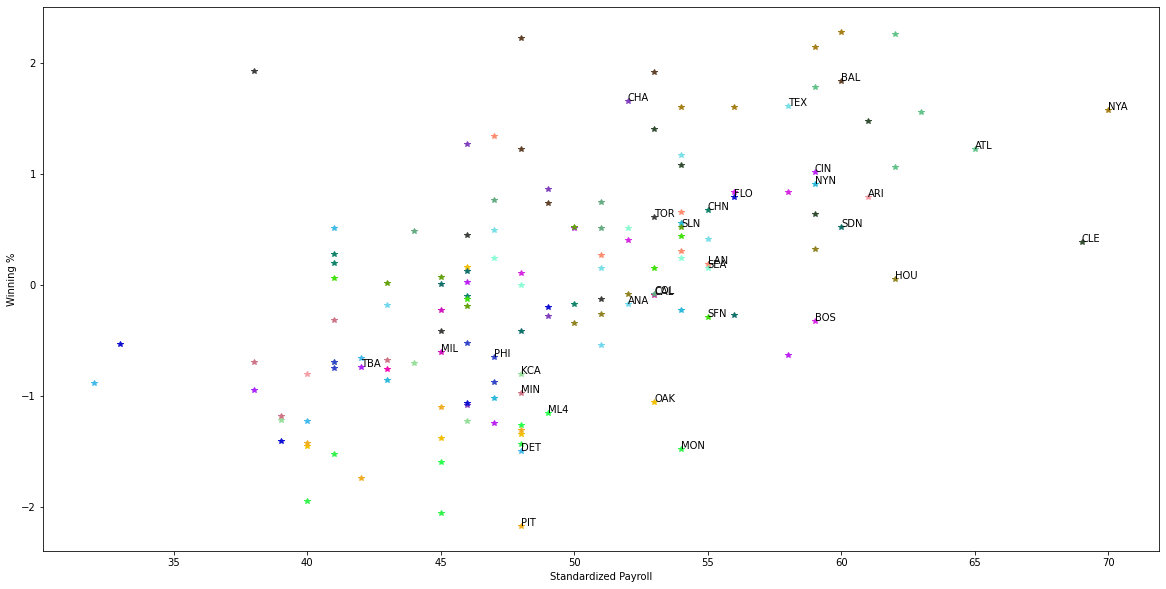

In [408]:
#1995-99
plotgroup(group2)

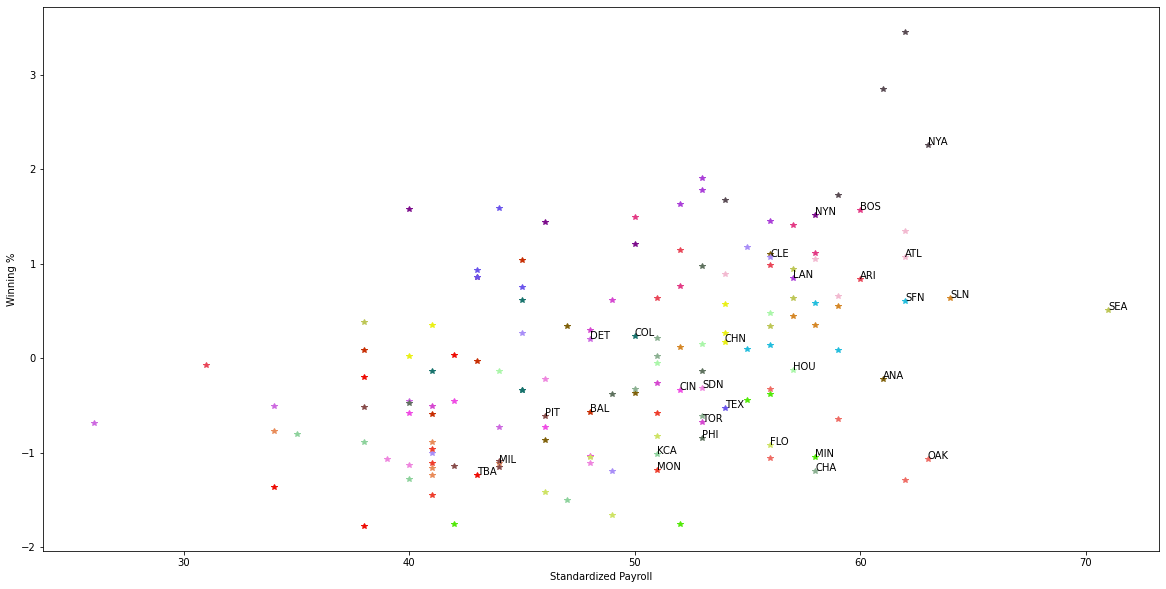

In [409]:
#2000-04
plotgroup(group3)

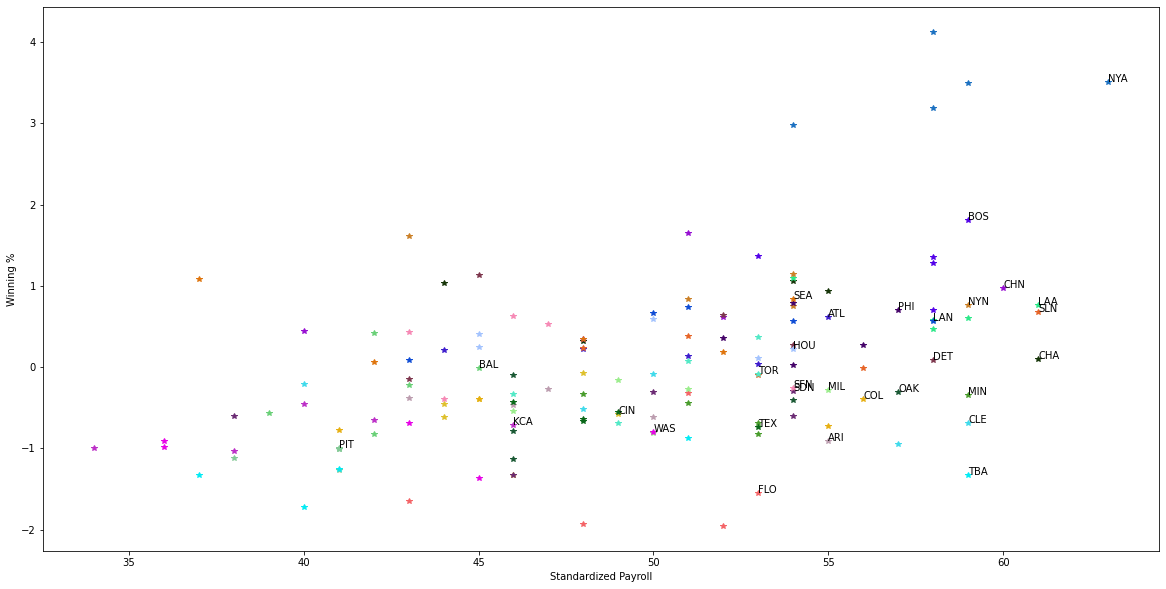

In [410]:
#2005-09
plotgroup(group4)

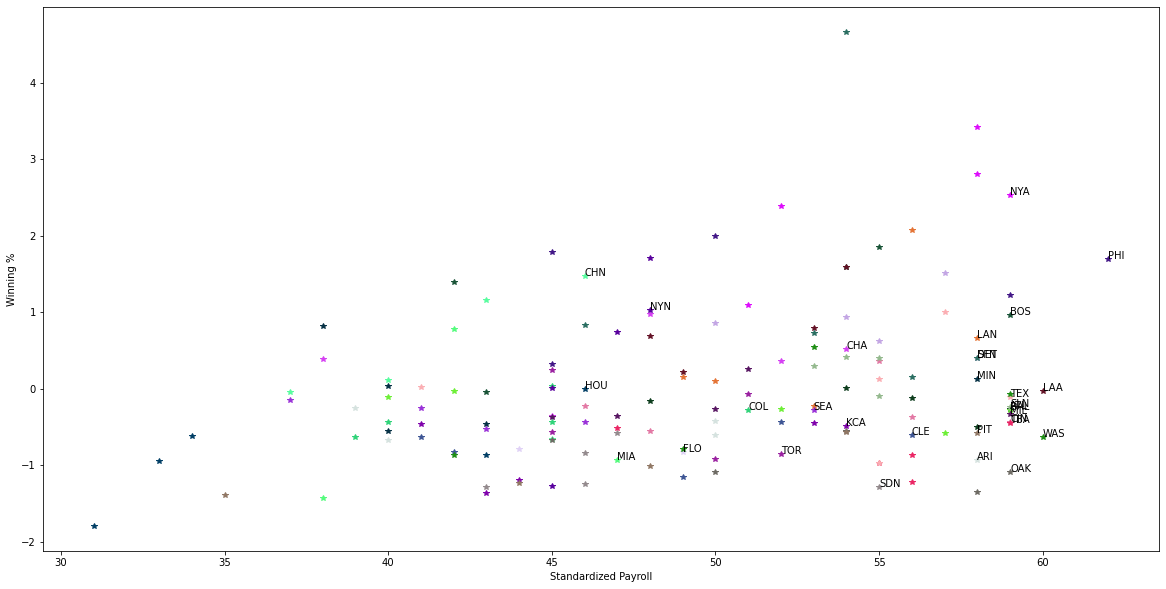

In [412]:
#2010-14
teams = group5['teamID'].drop_duplicates()
temp = group5[['teamID', 'winning_percentage', 'Standardized_Payroll']]
temp = temp.set_index('teamID')
group5 = group5.dropna();
for t in teams:
    temp1 = group5.loc[lambda x: x.teamID == t, :]
    if temp1['winning_percentage'].empty:
        print('')
    else:
        best_row = temp1.loc[temp1['winning_percentage'].idxmax()]
        plt.annotate(t, xy = (best_row['winning_percentage'], best_row['Standardized_Payroll']))
        plt.plot(temp.loc[t,'winning_percentage'], temp.loc[t,'Standardized_Payroll'],'*',color=np.random.rand(3,))
    plt.xlabel('Standardized Payroll')
    plt.ylabel('Winning %')
    plt.rcParams["figure.figsize"] = (20,10)

With the new standardized payroll variable, the plots are more spaced out and the distribution there seems to be a clearer distribution.

#### Making a single scatter plot of winning percentage (y-axis) vs. standardized payroll (x-axis).

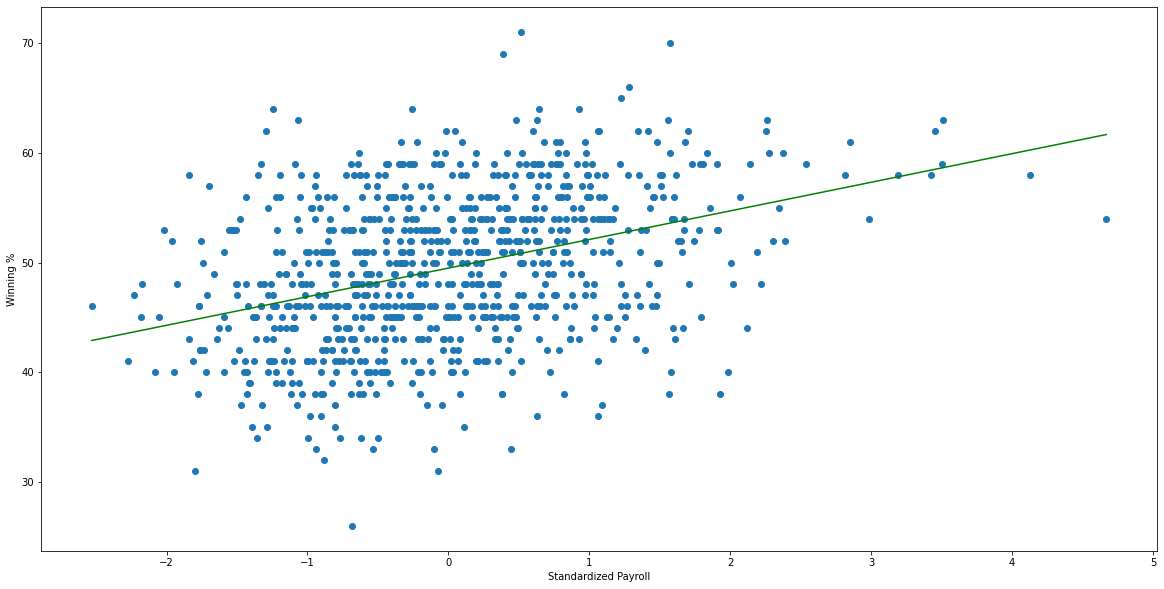

In [366]:
group_table = group_table[np.isfinite(group_table['winning_percentage'])]
group_table = group_table[np.isfinite(group_table['Standardized_Payroll'])]

#regression line
a, b = np.polyfit(group_table['Standardized_Payroll'], group_table['winning_percentage'], 1)
x = np.linspace(group_table['Standardized_Payroll'].min(),group_table['Standardized_Payroll'].max(),100)
plt.plot(group_table['Standardized_Payroll'],group_table['winning_percentage'],'o')
plt.plot(x, a*x+b, color='g')
plt.xlabel('Standardized Payroll')
plt.ylabel('Winning %')
plt.rcParams["figure.figsize"] = (20,10)

Using these results, I can now create a single plot that makes it easier to compare teams efficiency. The idea is to create a new measurement unit for each team based on their winning percentage and their expected winning percentage that we can plot across time summarizing how efficient each team is in their spending.

#### Creating a new field to compute each team's spending effiency

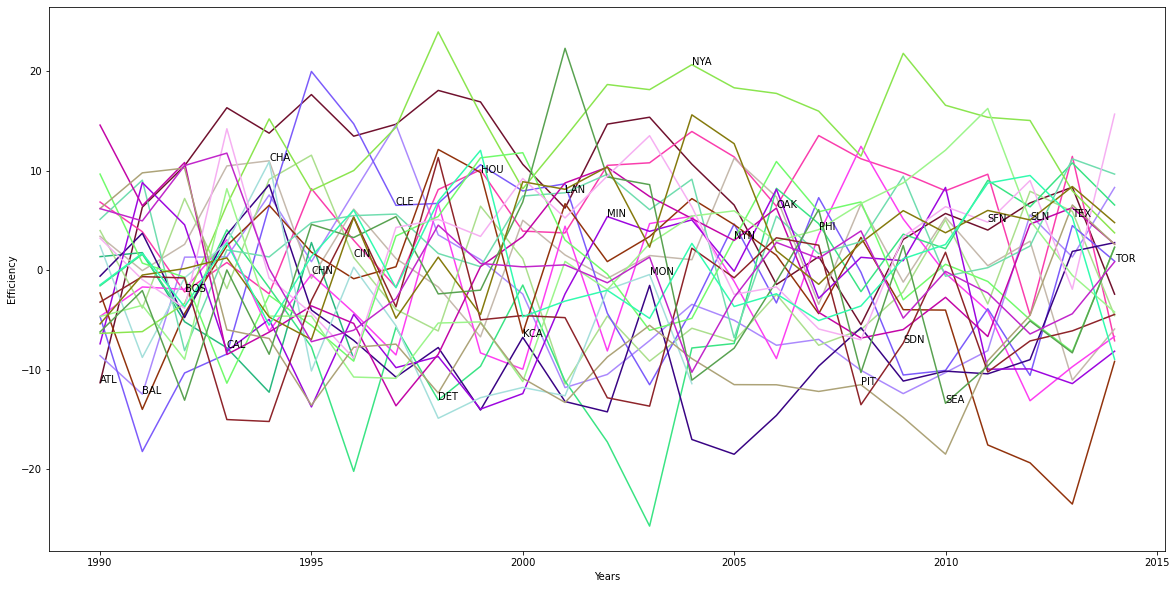

In [415]:
eff = []

for index, row in group_table.iterrows():
    eff.append(row['winning_percentage'] - 50 + 2.5 * row['Standardized_Payroll'])
    
group_table['efficiency'] = eff

group_table.sort_values("yearID", ascending=True)
temp = group_table[group_table['yearID'] >= 1990] 
temp = temp[temp['yearID'] <= 2014]
teams = temp['teamID'].drop_duplicates()
temp = temp[['yearID', 'teamID', 'efficiency']]
temp = temp.set_index('teamID')
year = 1990
for t in teams:
    temp1 = temp.loc[lambda x: x.yearID == year, :]
    if t in temp1.index:
        num = temp1.loc[t,'efficiency']
        plt.annotate(t, xy = (year, num))
        plt.plot(temp.loc[t]['yearID'], temp.loc[t]['efficiency'],color=np.random.rand(3,))
        if (year < 2014):
            year+=1
        else:
            year = 1990
            
plt.xlabel('Years')
plt.ylabel('Efficiency')
plt.rcParams["figure.figsize"] = (20,10)

The Teams that were good at paying for wins are more efficient. The New York Yankees exemplify this as they clearly spent the most money but also achieved great success as the graph shows. Oakland's efficiency over the Moneyball was definitely good as they seemed to have a higher efficiency than the majority of teams during that time. While they never really reached the heights of the Yankees, they were above average which is very impressive for a team of their stature